In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


### Step 1: Reading and understanding data 

In [5]:
car_data = pd.read_csv('carPrice_Assignment.csv')
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car_data.shape

(205, 26)

In [7]:
#Checking if our dataframe has any missing values
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There is no missing value in the data.

In [8]:
#Checking the spread of the data

car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The numerical data are evenly spread. No outliers detected.

### Step-2: Data Cleaning and Preparation

In [9]:
#Spliting the company name from the column CarName
company = car_data['CarName'].apply(lambda x: x.split(' ')[0])
car_data.insert(3,'company',company)

car_data.head()

,car_ID,symboling,CarName,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#Dropping the column CarName as it is not required

car_data = car_data.drop('CarName',axis=1)
car_data.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
#It is observed that there are some issues with the name of company. Few names are similar.
#Lets check the unique-ness of the column

car_data.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

The names Nissan,porsche,mazda and volkswagen has duplicate names with spelling error. Lets fix that.

In [12]:
#Function to replace the misspelled names

def fix_company(a,b):
    car_data.company.replace(a,b,inplace=True)
    
fix_company('maxda','mazda')
fix_company('Nissan','nissan')
fix_company('porcshce','porsche')
fix_company('toyouta','toyota')
fix_company('vokswagen','volkswagen')
fix_company('vw','volkswagen')

car_data.company.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#Checking for duplicates

car_data.loc[car_data.duplicated()]

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
car_data.columns

Index(['car_ID', 'symboling', 'company', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Step-3: Visualising the data
#### 3.1 Visualising the numerical data

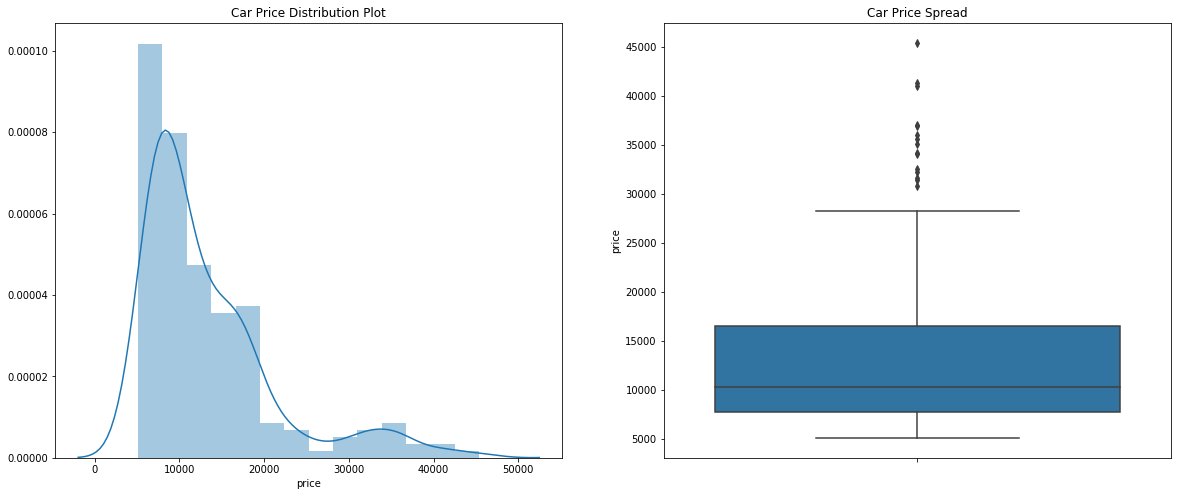

In [15]:
#Checking the distribution of target variable price

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_data.price)

plt.show()

In [16]:
print(car_data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inference :

- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)



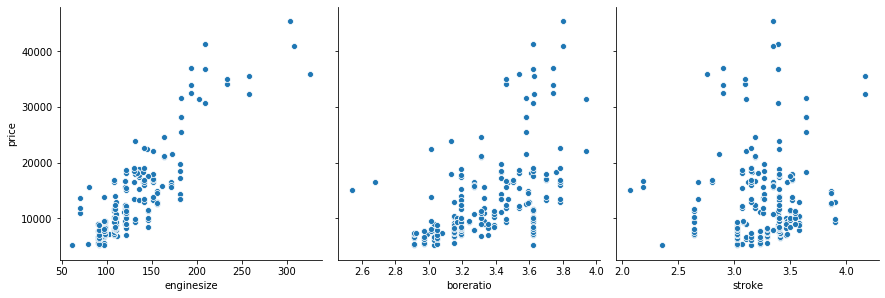

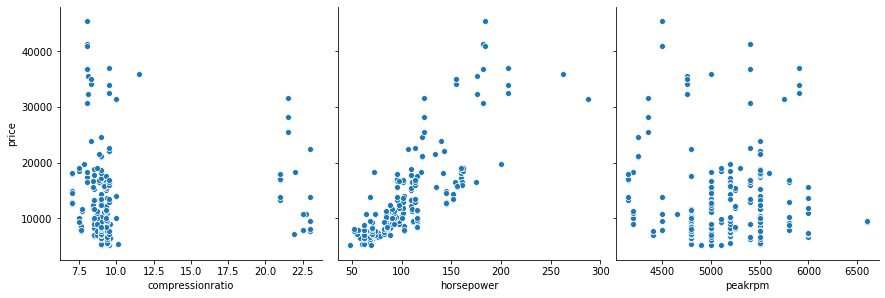

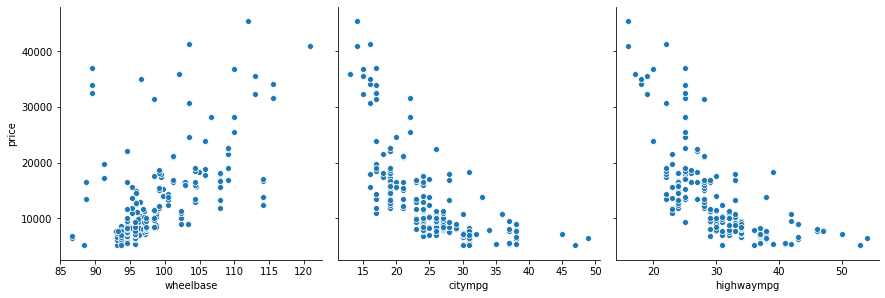

In [17]:
def pair_plot(x,y,z):
    sns.pairplot(car_data, x_vars=[x,y,z], y_vars='price',size=4)
    plt.show()

pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

Inference :

- enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
- citympg, highwaympg - seem to have a significant negative correlation with price.



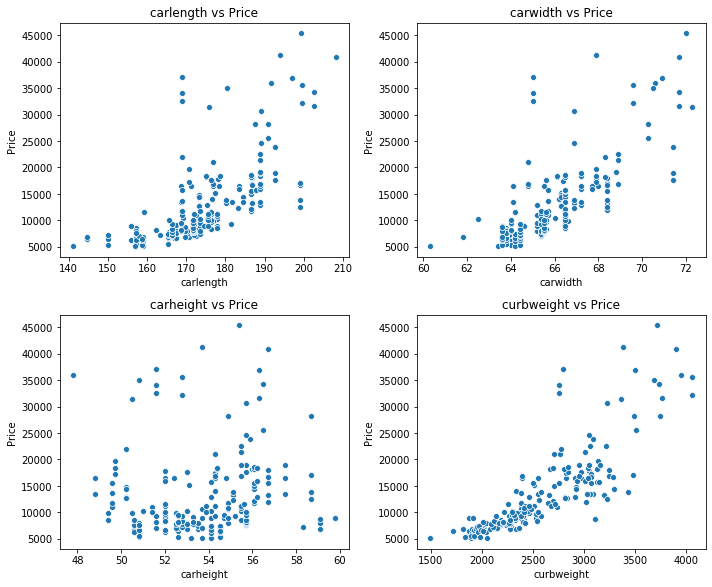

In [18]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    sns.scatterplot(car_data[x],car_data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Inference :

-    carwidth, carlength and curbweight seems to have a poitive correlation with price.
- carheight doesn't show any significant trend with price.



#### 3.2 Visualising the Categorical data

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

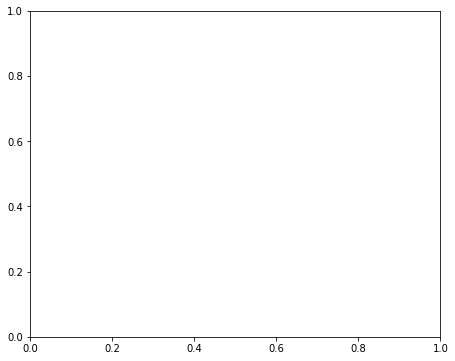

In [19]:
#plt.figure(figsize=(25, 6))

#plt.subplot(1,3,1)
##plt1 = car_data.company.value_counts().plot('bar')
#plt.title('Companies Histogram')
#plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

#plt.subplot(1,3,2)
#plt1 = car_data.fueltype.value_counts().plot('bar')
#plt.title('Fuel Type Histogram')
#plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')#

plt.subplot(1,3,3)
plt1 = car_data.carbody.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Inference :

- Toyota seemed to be favored car company.
- Number of gas fueled cars are more than diesel.
- sedan is the top car type prefered.



In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(car_data.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=car_data.symboling, y=car_data.price, palette=("cubehelix"))

plt.show()

Inference :

- It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
- The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.



In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(car_data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=car_data.enginetype, y=car_data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(car_data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


Inference :

- ohc Engine type seems to be most favored type.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.



In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car_data.groupby(['company'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(car_data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(car_data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference :

- Jaguar and Buick seem to have highest average price.
- diesel has higher average price than gas.
- hardtop and convertible have higher average price.



In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car_data.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_data.doornumber, y=car_data.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car_data.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_data.aspiration, y=car_data.price)

plt.show()

Inference :

- doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)



In [ ]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(car_data[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=car_data[x], y=car_data.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

### Step 4: Derived Metrics 

Lets look at the data frame and see if we can create some new features using the existing columns

In [20]:
car_data.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
#We have mileage in the city and mileage in the highways. Lets take average of both to create a new feature
# average mileage of the car, 'avgmpg'

car_data['avgmpg'] = (car_data['citympg']+car_data['highwaympg'])/2
car_data.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0


In [22]:
#Binning the companies based on avg prices of each company.

car_data['price'] = car_data['price'].astype('int')
temp = car_data.copy()
table = temp.groupby(['company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='company')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
car_data['pricerange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)

car_data.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg,pricerange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,24.0,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,24.0,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.5,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,27.0,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,20.0,Medium


In [23]:
car_data.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg,pricerange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,24.0,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,24.0,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.5,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,27.0,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,20.0,Medium


### Step 5 : Bivariate Analysis

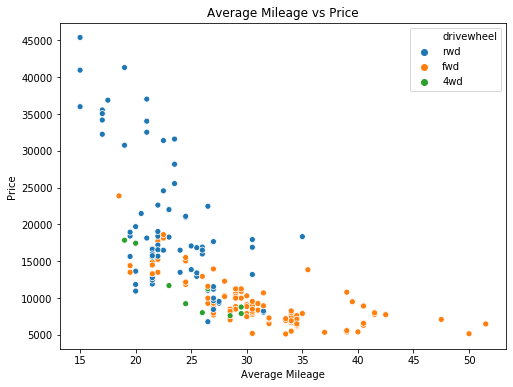

In [24]:
plt.figure(figsize=(8,6))

plt.title('Average Mileage vs Price')
sns.scatterplot(x=car_data['avgmpg'],y=car_data['price'],hue=car_data['drivewheel'])
plt.xlabel('Average Mileage')
plt.ylabel('Price')

plt.show()


Inference :

- ***avgmpg*** has an obvios negative correlation with ***price*** and is significant.



<Figure size 1800x432 with 0 Axes>

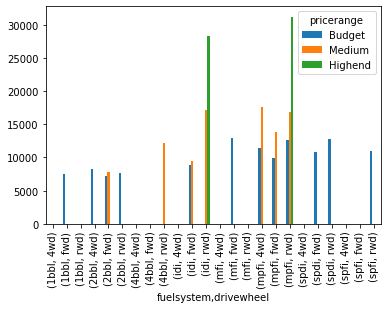

In [25]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car_data.groupby(['fuelsystem','drivewheel','pricerange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.show()


Inference :

- High ranged cars prefer rwd ***drivewheel*** with idi or mpfi ***fuelsystem***.



### Inference from the visual analysis:

BAsed on the visual analysis,we will consider only these significant variables for our further analysis.
- pricerange
- enginetype
- carbody
- aspiration
- cylindernumber
- fueltype
- drivewheel
- curbweight
- carlength
- carwidth
- enginesize
- boreratio
- horsepower
- wheelbase
- avgmpg


In [26]:
car_lr = car_data[['price','enginetype','carbody','aspiration','cylindernumber','fueltype',
                   'drivewheel','curbweight','carlength','carwidth','enginesize','boreratio',
                   'horsepower','wheelbase','avgmpg','pricerange']]
car_lr.head()

,price,enginetype,carbody,aspiration,cylindernumber,fueltype,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,avgmpg,pricerange
0,13495,dohc,convertible,std,four,gas,rwd,2548,168.8,64.1,130,3.47,111,88.6,24.0,Medium
1,16500,dohc,convertible,std,four,gas,rwd,2548,168.8,64.1,130,3.47,111,88.6,24.0,Medium
2,16500,ohcv,hatchback,std,six,gas,rwd,2823,171.2,65.5,152,2.68,154,94.5,22.5,Medium
3,13950,ohc,sedan,std,four,gas,fwd,2337,176.6,66.2,109,3.19,102,99.8,27.0,Medium
4,17450,ohc,sedan,std,five,gas,4wd,2824,176.6,66.4,136,3.19,115,99.4,20.0,Medium


### Model Building 

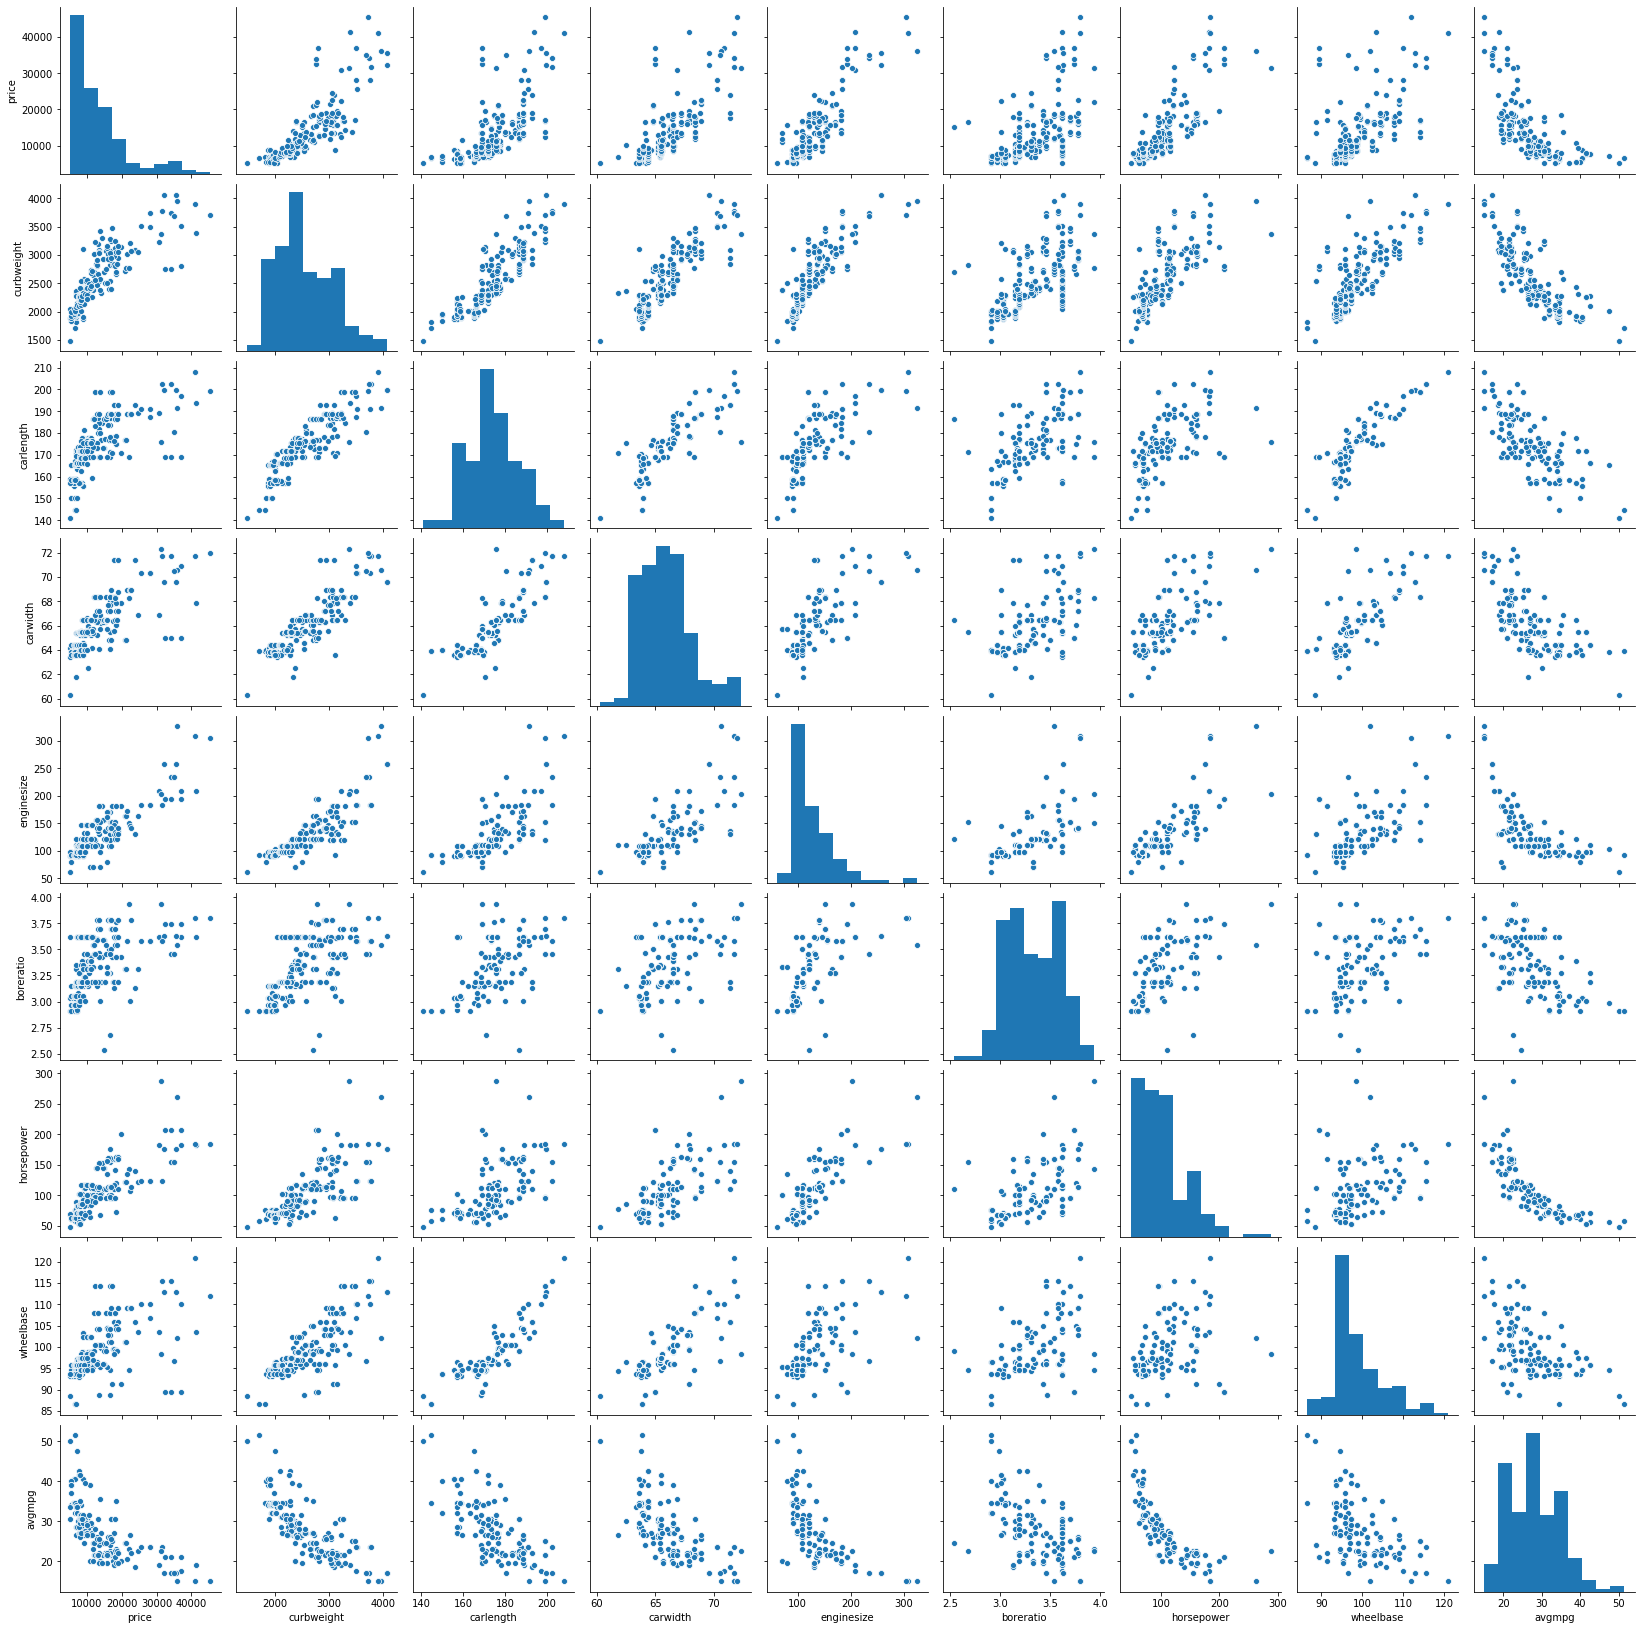

In [27]:
#Checking the final data

sns.pairplot(car_lr)
plt.show()

The above scatter plots show that all the variables in our data are now strongly correlated with price. 

### Step 6: Creating dummy variables

In [28]:
# Defining the map function
def dummy(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

car_lr = dummy('fueltype',car_lr)
car_lr = dummy('aspiration',car_lr)
car_lr = dummy('carbody',car_lr)
car_lr = dummy('drivewheel',car_lr)
car_lr = dummy('enginetype',car_lr)
car_lr = dummy('cylindernumber',car_lr)
car_lr = dummy('pricerange',car_lr)

In [ ]:
car_lr.head()

In [ ]:
car_lr.shape

In [ ]:
car_lr.info()

We have converted all our columns to numerical values.

### Step 7: Splitting the Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_lr, train_size = 0.7, test_size = 0.3, random_state = 100)


#### Rescaling the features

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','avgmpg','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [221]:
df_train.head()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,avgmpg,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.272692,0.426016,0.291667,0.139623,0.230159,0.083333,0.244828,0.534247,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.500388,0.452033,0.666667,0.339623,1.000000,0.395833,0.272414,0.219178,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.314973,0.448780,0.308333,0.139623,0.444444,0.266667,0.272414,0.342466,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.411171,0.450407,0.316667,0.260377,0.626984,0.262500,0.068966,0.246575,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.647401,0.775610,0.575000,0.260377,0.746032,0.475000,0.610345,0.123288,1,...,0,0,0,1,0,0,0,0,1,0


In [222]:
df_train.describe()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,avgmpg,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.407878,0.525476,0.461655,0.241351,0.497946,0.227302,0.411141,0.359805,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.211269,0.204848,0.184517,0.154619,0.207140,0.165511,0.205581,0.186087,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.245539,0.399187,0.304167,0.135849,0.305556,0.091667,0.272414,0.205479,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.355702,0.502439,0.425000,0.184906,0.500000,0.191667,0.341379,0.342466,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.559542,0.669919,0.550000,0.301887,0.682540,0.283333,0.503448,0.513699,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


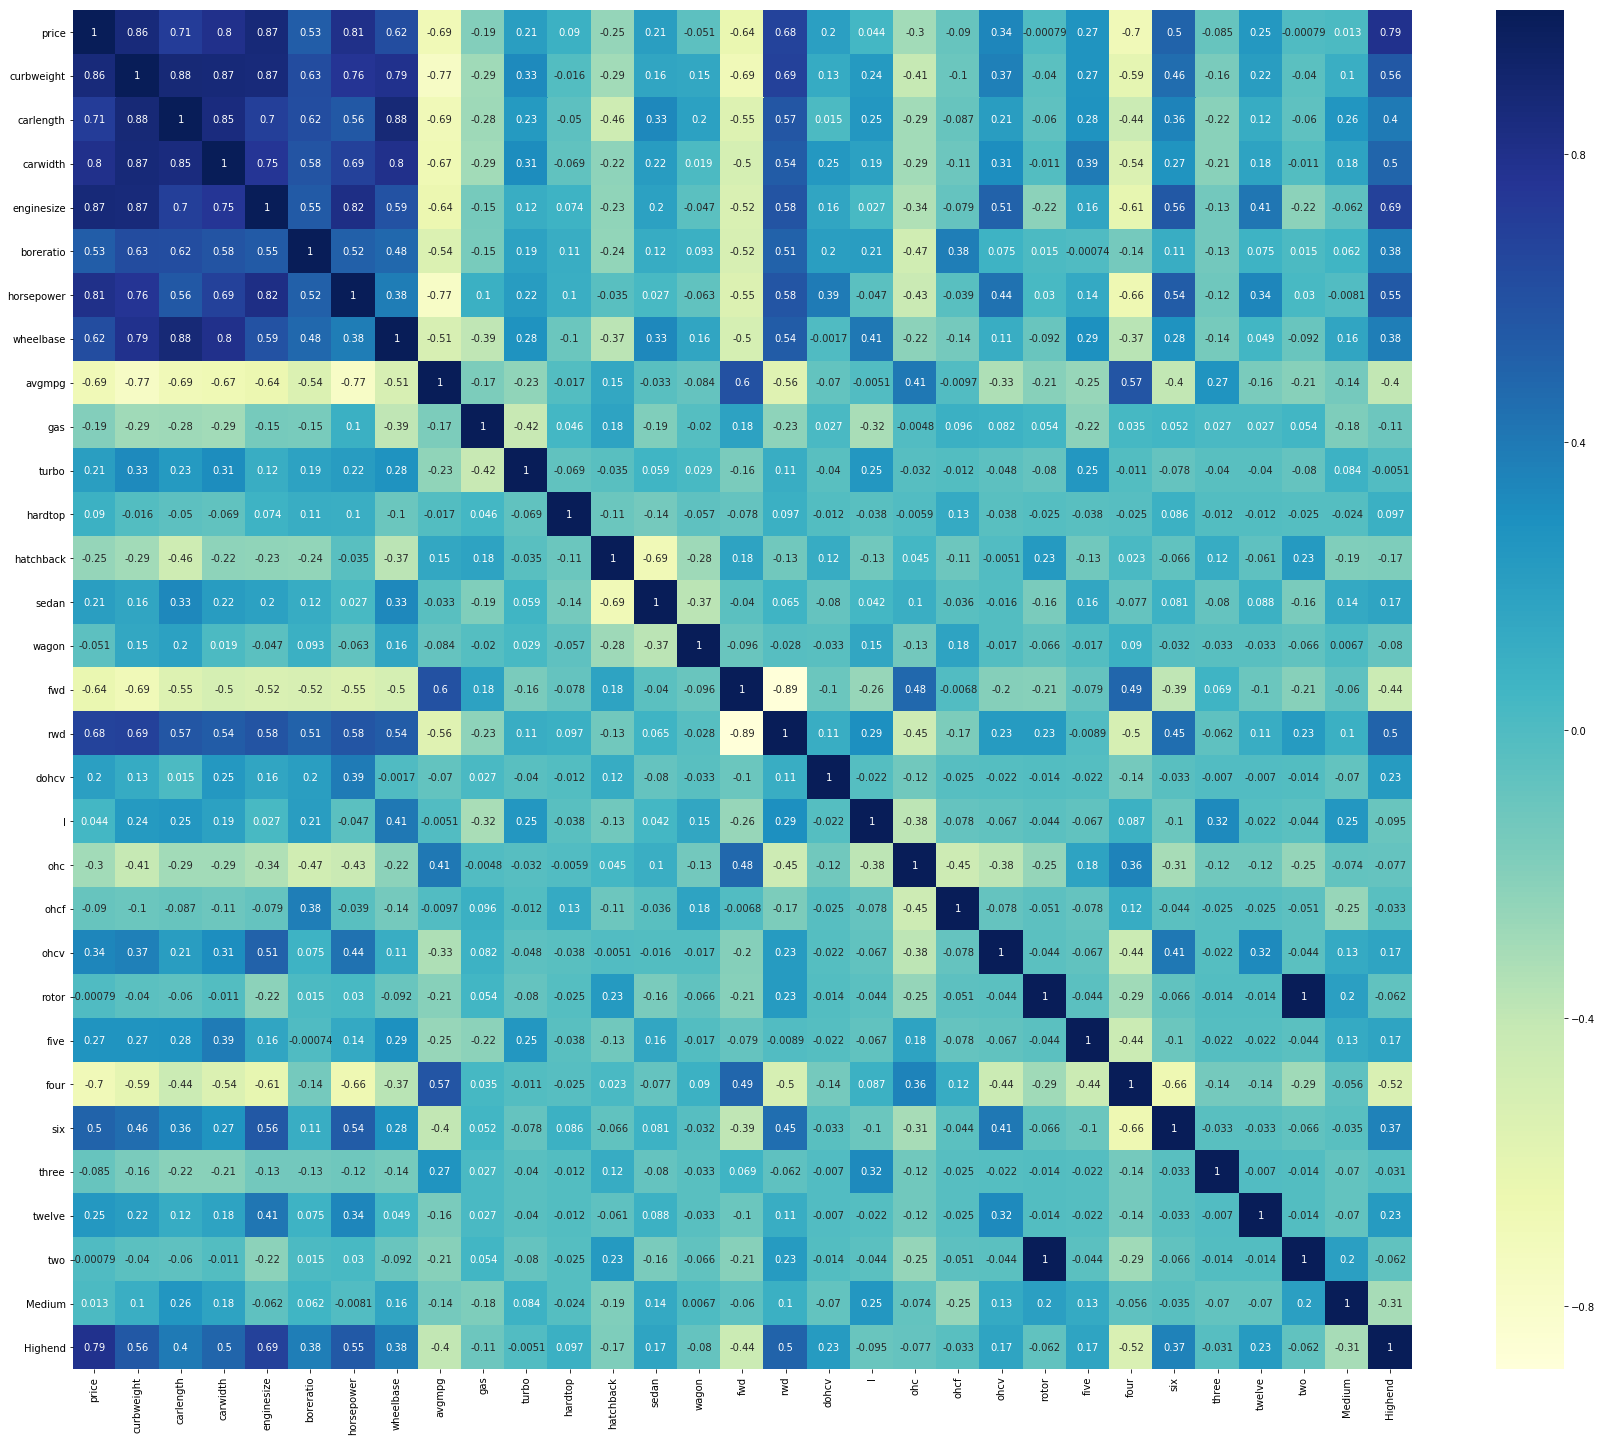

In [223]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - `curbweight`, `carwidth`, `enginesize`,`horsepower` and `highend`.

In [31]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [33]:
y_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64

### Step 8 : Model Building

In [225]:
#Importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [226]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [227]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('curbweight', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('wheelbase', False, 3),
 ('avgmpg', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [228]:
#Getting top 10 variables
X_train.columns[rfe.support_]

Index(['curbweight', 'carwidth', 'horsepower', 'avgmpg', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [229]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,carwidth,horsepower,avgmpg,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.291667,0.083333,0.534247,0,1,0,0,0,0
125,0.500388,0.666667,0.395833,0.219178,1,0,0,0,0,1
166,0.314973,0.308333,0.266667,0.342466,1,0,0,0,0,0
1,0.411171,0.316667,0.262500,0.246575,0,0,0,0,0,0
199,0.647401,0.575000,0.475000,0.123288,0,0,1,0,0,0


In [230]:
#Function for building the model
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

#Function for checking VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = vif['VIF'].round()
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## `Model 1`

In [231]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.30e-70
Time:                        20:27:16   Log-Likelihood:                 205.83
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.237      0.0

The predictor 'twelve' has the highest p-value (0.08) which is greater than 0.05.
Lets remove twelve

In [232]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

## `Model 2`

In [233]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.28e-71
Time:                        20:27:16   Log-Likelihood:                 204.16
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0765      0.041     -1.848      0.0

In the new model avgmpg's p-value is way more than the 0.05.
Lets remove that.

In [234]:
X_train_new = X_train_new.drop(["avgmpg"], axis = 1)

## `Model 3`

In [235]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.85e-72
Time:                        20:27:16   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [236]:
#Calculating the Variance Inflation Factor

checkVIF(X_train_new)

,Features,VIF
0,const,27.0
1,curbweight,8.0
4,hatchback,6.0
5,sedan,6.0
2,carwidth,5.0
3,horsepower,4.0
6,wagon,4.0
8,Highend,2.0
7,dohcv,1.0


Lets drop curbweight from the model as it has the VIF value of 8. which means it has high multi-colinearity

In [237]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

## `Model 4`

In [238]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.70e-70
Time:                        20:27:16   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [239]:
#Checking VIF again

checkVIF(X_train_new)

,Features,VIF
0,const,27.0
3,hatchback,6.0
4,sedan,6.0
2,horsepower,3.0
5,wagon,3.0
1,carwidth,2.0
7,Highend,2.0
6,dohcv,1.0


In [240]:
#Dropping sedan

X_train_new = X_train_new.drop(["sedan"], axis = 1)

## `Model 5`

In [241]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.68e-69
Time:                        20:27:17   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [242]:
#Checking VIF again

checkVIF(X_train_new)

,Features,VIF
0,const,11.0
1,carwidth,2.0
2,horsepower,2.0
6,Highend,2.0
3,hatchback,1.0
4,wagon,1.0
5,dohcv,1.0


Now all the VIF values are in the permitted range but we notice that the p-value of wagon has increased. Lets drop that

In [243]:
#Dropping Wagon

X_train_new = X_train_new.drop(["wagon"], axis = 1)

## `Model 6`

In [244]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.57e-70
Time:                        20:27:17   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [245]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.0
1,carwidth,2.0
2,horsepower,2.0
5,Highend,2.0
3,hatchback,1.0
4,dohcv,1.0


Now all the p-values and VIF look good. But We are having a R-squared value of 91.2% which is very unlikely. Lets drop dohcv to see if there is any change in R-squared value.

In [246]:
# Dropping dohcv

X_train_new = X_train_new.drop(["dohcv"], axis = 1)


## `Model 7`

In [247]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.04e-67
Time:                        20:27:17   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

The variable hatchback has a negative coefficient which is very less. Lets remove taht from our model and see how it affects the R-squared value.

In [248]:
#Dropping hatchback     
X_train_new = X_train_new.drop(["hatchback"], axis = 1)


## `Model 8`

In [249]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     381.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.18e-67
Time:                        20:27:17   Log-Likelihood:                 175.89
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     139   BIC:                            -331.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1068      0.017     -6.159      0.0

Now we see that our R-quared value came down to 89.2% which is still good, but the F-statistics value has increased significantly which suggests this is a better model

### Step 9 : Residual Analysis of Model

In [250]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

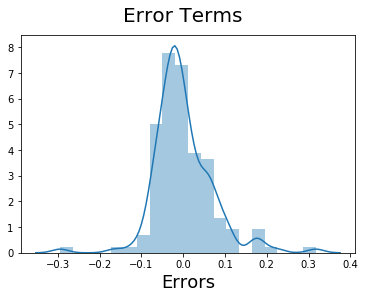

In [251]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)   
plt.show()

The residuals seem to be normally distributed with mean value 0, which satisfies our assumption.

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e.  **`Model 8`**

### Step 10 : Prediction and Evaluation

#### Applying the scaling on the test sets

In [252]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','avgmpg','carlength','carwidth','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [253]:
df_test.describe()

,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,avgmpg,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000
mean,0.239439,0.428470,0.559481,0.480376,0.265673,0.556580,0.248858,0.437764,0.346443,0.887097,...,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.435484,0.112903
std,0.233076,0.179488,0.189947,0.165440,0.162820,0.228484,0.163376,0.212861,0.175523,0.319058,...,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.499868,0.319058
min,0.007763,0.128394,0.056911,0.183333,0.067925,-0.111111,0.016667,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.092342,0.305275,0.459350,0.358333,0.177358,0.404762,0.107292,0.313793,0.195205,1.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.158991,0.406129,0.547967,0.441667,0.226415,0.563492,0.218750,0.387931,0.328767,1.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,0.317243,0.564876,0.719919,0.516667,0.316038,0.746032,0.295833,0.570690,0.452055,1.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000
max,1.112855,0.935609,1.089431,0.975000,0.932075,0.888889,0.662500,1.182759,0.753425,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


In [254]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [255]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [256]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [257]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8920549979558158

We got the same r2 score as the training dataset. That means the model is pretty good.

Text(0, 0.5, 'y_pred')

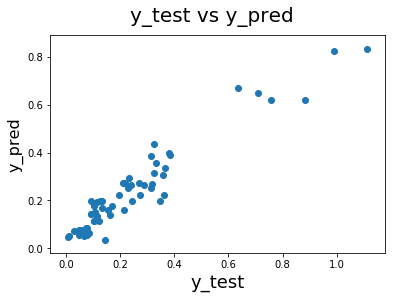

In [259]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

The spreading looks pre

In [260]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     381.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.18e-67
Time:                        20:41:02   Log-Likelihood:                 175.89
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     139   BIC:                            -331.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1068      0.017     -6.159      0.0

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.892 and 0.889 - The variance is pretty good.
2. *F-stats and Prob(F-stats) (overall model fit)* - 381.0 and 7.18e-67(approx. 0.0) - Model fit is significant and explained variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.


We can see that the equation of our best fitted line is:

$ price = -0.1068 + 0.4320  \times  carwidth + 0.4057  \times  horsepower + 0.2895 \times Highend $